In [1]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools,theory_tools
from wremnants import histselections as sel, combine_helpers as ch
import lz4.frame
import pickle
import numpy as np
import hist
import uproot
import matplotlib
from wremnants import postfit_helpers

Welcome to JupyROOT 6.27/01


In [2]:
%load_ext autoreload
%autoreload 2

In [12]:
combine_path = "../combineResults/Wmass/qcdScaleByHelicityPt/pdfNNPDF31_PseudoCT18/"
postfit_helper = postfit_helpers.PostfitHelper(f"{combine_path}/fitresults_123456789.root", f"{combine_path}/WMassCombineInput.root")
postfit_helper.read_covariance_matrix()

In [63]:
postfit_helper.set_nuisance_subset_by_regex("pdf\d+NNPDF31")
#postfit_helper.set_nuisance_scaling("pdf.*Alpha.*", 0.75)

In [64]:
postfit_helper.set_hist_name("pdfCT18_Wmunu")
pseudo_data = postfit_helper.read_combine_hist("")
postfit_helper.set_hist_name("x_Wmunu")
postfit_helper.read_nominal_hist()

In [91]:
nom = postfit_helper.nominal_hist
up_var, down_var = postfit_helper.postfit_tot_uncertainty_hists()
prefit_up_var, prefit_down_var = postfit_helper.prefit_tot_uncertainty_hists()

Sum is 9877960380.246191
Sum is 9877960380.246191


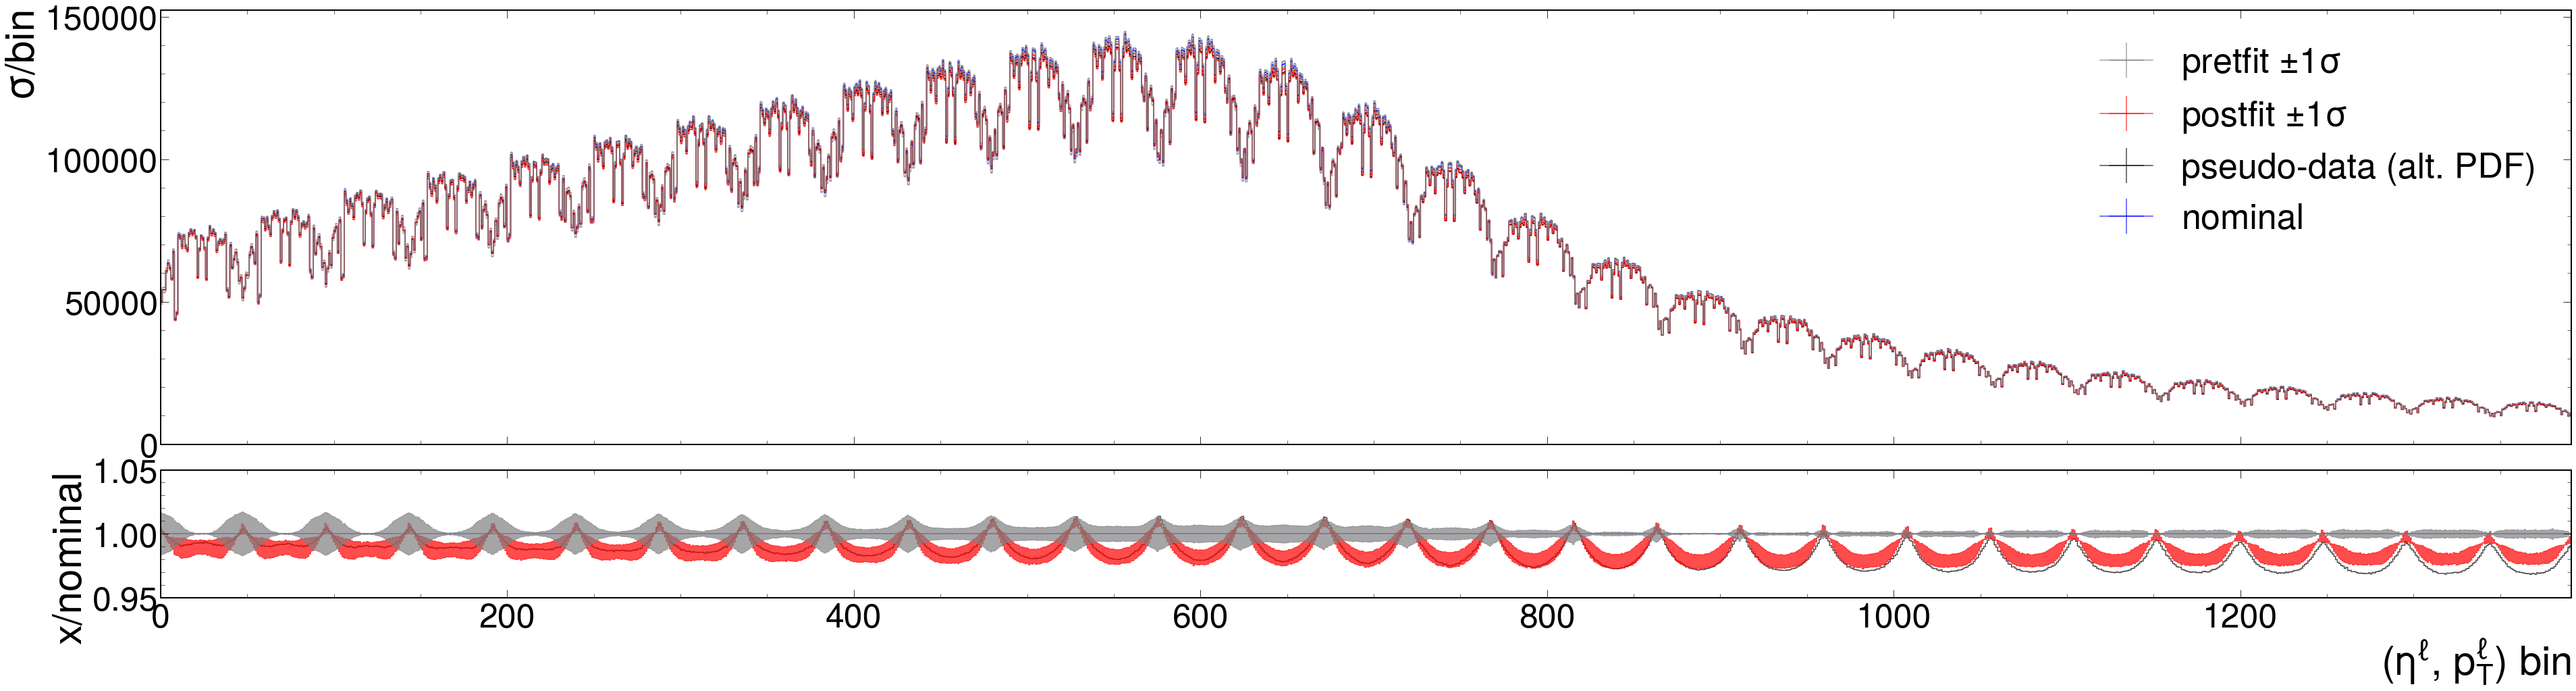

In [116]:
hists = [sel.unrolledHist(h[{"charge" : hist.sum}]) for h in [hnom, pseudo_data, up_var, down_var, prefit_up_var, prefit_down_var, ]]
colors = ["blue", "black", "red", "red", "grey", "grey",]
labels = ["nominal", "pseudo-data (alt. PDF)", "postfit $\pm 1\sigma$", "", "pretfit $\pm 1\sigma$", "", ]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=labels, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="($\eta^{\ell}$, p$_{T}^{\mathrm{\ell}}$) bin", rlabel="x/nominal", binwnorm=1.0, nlegcols=1, fill_between=True, alpha=0.7, skip_fill_between=2)

In [161]:
combine_path = "../combineResults/Wmass/qcdScaleByHelicityPt/pdfCT18_PseudoNNPDF31"
postfit_helper_ct18 = postfit_helpers.PostfitHelper(f"{combine_path}/fitresults_123456789.root", f"{combine_path}/WMassCombineInput.root")
postfit_helper_ct18.read_covariance_matrix()

In [ ]:
postfit_helper_ct18.set_hist_name("pdfNNPDF31_Wmunu")
pseudo_data = postfit_helper.read_combine_hist("")
postfit_helper_ct18.set_hist_name("x_Wmunu")
postfit_helper_ct18.read_nominal_hist()
postfit_helper_ct18.set_nuisance_subset_by_regex("pdf\d+CT18")
postfit_helper_ct18.set_nuisance_scaling("pdf\d+CT18", 1/1.64)

In [166]:
hnom = postfit_helper_ct18.nominal_hist
up_var, down_var = postfit_helper_ct18.postfit_tot_uncertainty_hists()
prefit_up_var, prefit_down_var = postfit_helper_ct18.prefit_tot_uncertainty_hists()

Scaling pdf0CT18 by 0.6097560975609756
Scaling pdf10CT18 by 0.6097560975609756
Scaling pdf11CT18 by 0.6097560975609756
Scaling pdf12CT18 by 0.6097560975609756
Scaling pdf13CT18 by 0.6097560975609756
Scaling pdf14CT18 by 0.6097560975609756
Scaling pdf15CT18 by 0.6097560975609756
Scaling pdf16CT18 by 0.6097560975609756
Scaling pdf17CT18 by 0.6097560975609756
Scaling pdf18CT18 by 0.6097560975609756
Scaling pdf19CT18 by 0.6097560975609756
Scaling pdf1CT18 by 0.6097560975609756
Scaling pdf20CT18 by 0.6097560975609756
Scaling pdf21CT18 by 0.6097560975609756
Scaling pdf22CT18 by 0.6097560975609756
Scaling pdf23CT18 by 0.6097560975609756
Scaling pdf24CT18 by 0.6097560975609756
Scaling pdf25CT18 by 0.6097560975609756
Scaling pdf26CT18 by 0.6097560975609756
Scaling pdf27CT18 by 0.6097560975609756
Scaling pdf28CT18 by 0.6097560975609756
Scaling pdf2CT18 by 0.6097560975609756
Scaling pdf3CT18 by 0.6097560975609756
Scaling pdf4CT18 by 0.6097560975609756
Scaling pdf5CT18 by 0.6097560975609756
Scalin

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


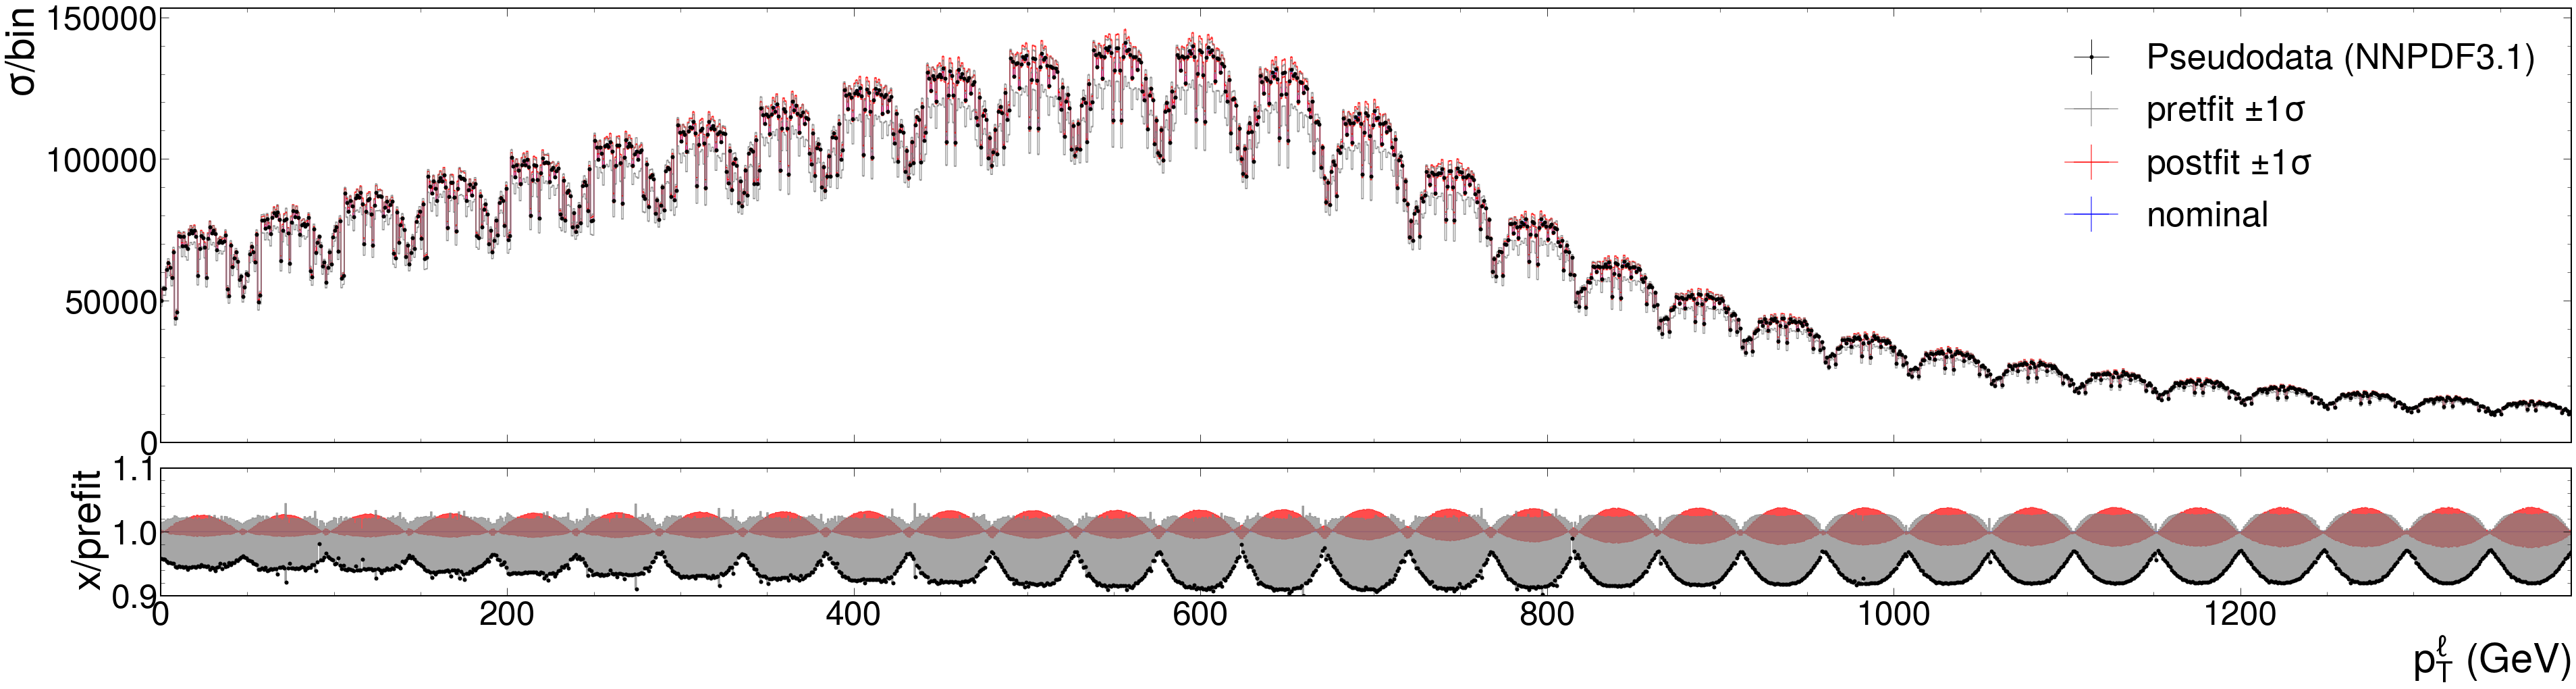

In [165]:
hists = [sel.unrolledHist(h[{"charge" : hist.sum}]) for h in [nom, up_var, down_var, prefit_up_var, prefit_down_var, ]]
colors = ["blue", "red", "red", "grey", "grey",]
labels = ["nominal", "postfit $\pm 1\sigma$", "", "pretfit $\pm 1\sigma$", "", ]
fig = plot_tools.makePlotWithRatioToRef(hists, data=sel.unrolledHist(pseudo_data), data_label="Pseudodata (NNPDF3.1)", colors=colors, labels=labels, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{\ell}}$ (GeV)", rlabel="x/prefit", binwnorm=1.0, nlegcols=1, fill_between=True, alpha=0.7)

In [ ]:
hists = [sel.unrolledHist(h[{"charge" : hist.sum}]) for h in [hnom, prefit_up_var, prefit_down_var, ]]
colors = ["blue", "grey", "grey",]
labels = ["nominal", "pretfit $\pm 1\sigma$", "", ]
fig = plot_tools.makePlotWithRatioToRef(hists, data=sel.unrolledHist(pseudo_data[{"charge" : hist.sum}]), data_label="pseudodata",colors=colors, labels=labels, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{\ell}}$ (GeV)", rlabel="x/prefit", binwnorm=1.0, nlegcols=1, alpha=0.7)


In [ ]:
theta_up.shape

In [ ]:
theta_down = np.insert(pdf_pulls - np.sqrt(w)*v, 0, values=pdf_pulls, axis=0)

In [ ]:
pdf_up = np.prod(np.power(kappa[...,np.newaxis].T, theta_up[...,np.newaxis,np.newaxis]), axis=1).T

In [ ]:
pdf_down = np.prod(np.power(kappa[...,np.newaxis].T, theta_down[...,np.newaxis,np.newaxis]), axis=1).T

In [ ]:
pdf_hist_post_up = pdf_hist_pre.copy()
pdf_hist_post_up[...,:] = nominal_hist.values()[...,np.newaxis]*pdf_up

In [ ]:
pdf_hist_post_down = pdf_hist_pre.copy()
pdf_hist_post_down[...,:] = nominal_hist.values()[...,np.newaxis]*pdf_down

In [ ]:
hists = [sel.unrolledHist(x) for x in [pdf_hist_pre[...,0], pdf_hist_post_up[...,0], wpost[{"charge" : 1.j}]]]
labels = ["pre", "post", "full post"]
colors = ["black", "red", "green"]

fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=labels, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{\ell}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)

In [ ]:
hists = [sel.unrolledHist(x) for x in [pdf_hist_post_up[...,i] for i in range(101)]]
colors = ["black"]+["red" for i in range(1,101)]
labels = ["Cen."]+[f"pdf{i}" for i in range(1,101)]

In [ ]:
postUp, postDown = theory_tools.hessianPdfUnc(pdf_hist_post_up, "pdfIdx")
preUp, preDown = theory_tools.hessianPdfUnc(pdf_hist_pre, "pdfIdx")

In [ ]:
postUp = theory_tools.

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=labels, rrange=[0.98, 1.02], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{\ell}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)

In [ ]:
hists = [sel.unrolledHist(x) for x in [pdf_hist_pre[...,0], preUp, preDown, postUp, postDown]]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "red", "green", "green"], labels=["prefit MC (NNPDF3.1)", "prefit unc.", "", "postfit (CT18)+unc", ""], rrange=[0.97, 1.03], ylabel="Events/bin", xlabel=r"($\eta^{\ell}$, p$_{\mathrm{T}}^{\ell}$) bin",  rlabel="x/prefit", binwnorm=1.0, nlegcols=1, fill_between=True, alpha=0.5)


In [ ]:
hists = [sel.unrolledHist(x) for x in [wpre[...,1.j], wpost[...,1.j], pdf_hist_post_up[...,0]]]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "green",], labels=["central (prefit)", "full postfit", "postfit PDF only",], rrange=[0.96, 1.04], ylabel="$\sigma$/bin", xlabel="$\eta^{\ell}$", rlabel="x/MC pred.", binwnorm=1.0, nlegcols=1)

In [ ]:
hists = [sel.unrolledHist(x) for x in [wpre[...,1.j], wpost[...,1.j], pdf_hist_post_up[...,0]]]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "green",], labels=["central (prefit)", "W postfit", "W postfit PDF only",], rrange=[0.96, 1.04], ylabel="$\sigma$/bin", xlabel=r"($\eta^{\ell}$, p$_{\mathrm{T}}^{\ell}$) bin",  rlabel="x/MC pred.", binwnorm=1.0, nlegcols=1)


In [ ]:
hists = [sel.unrolledHist(x) for x in [prefit[...,1.j], pseudoData[...,1.j], fitres[...,1.j], ]]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["red", "black", "green",], labels=["Pseudodata", "full postfit (all procs.)", "prefit (MC pred.)",], rrange=[0.96, 1.04], ylabel="Events/bin", xlabel=r"($\eta^{\ell}$, p$_{\mathrm{T}}^{\ell}$) bin",  rlabel="x/MC pred.", binwnorm=1.0, nlegcols=1)


In [ ]:
pseudoData = sumChansAndUnroll(pseudoData_all)
fitres = sumChansAndUnroll(fitres_all)
pre = sumChansAndUnroll(pre_all)

In [ ]:
font = {'size'   : 22}
matplotlib.rc('font', **font)

In [ ]:
hists = [pseudoData, fitres, pre]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "blue"], labels=["CT18 pseudodata", "postfit sum MC", "prefit sum MC",], rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel=r"($\eta^{\ell}$, p$_{\mathrm{T}}^{\ell}$) bin", rlabel="x/pseudodata", binwnorm=1.0, nlegcols=1)




In [ ]:
wpre

In [ ]:
hists = [sel.unrolledHist(x) for x in [wpre, wpost, ]]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red",], labels=["prefit (NNPDF3.1)", "postfit (CT18)", "prefit sum MC",], rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel=r"($\eta^{\ell}$, p$_{\mathrm{T}}^{\ell}$) bin", rlabel="x/pseudodata", binwnorm=1.0, nlegcols=1)


